<center><h2> Quantum Harmonic Oscillator Wave Function</h2></center>
<p>
    The 1-D Schrödinger equation is solved numerically for the wave function, where it should be that 
    $\lambda = 2n+1$ with $n$ an integer: 
    $$
    -\frac{\hbar^2}{2m}\frac{d^2u}{dx^2}+\frac{Kx^2}{2}u = Eu,  \quad   
    H''-2\xi H'+(\lambda -1)H = 0.
    $$

<IPython.core.display.Javascript object>


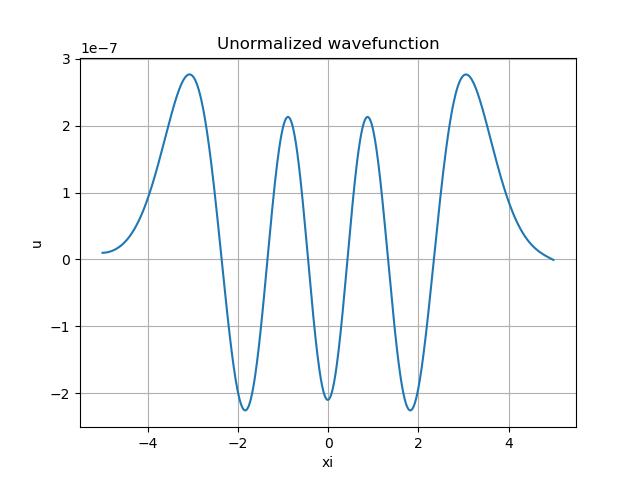

In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# QuantumHO.ipynb: Numerical solution for 1-D Harmonic Oscillator

% matplotlib notebook

import numpy as np
import matplotlib.pylab as plt                                  

n = 6   # n intger >0   n = 1,2,3,...                       
tt = np.zeros((1000),float)             
yy = np.zeros((1000),float)             

def f(r,y):                          # right hand side of equation
    rhs = np.zeros(2)                       
    rhs[0] = y[1]
    rhs[1] = -(2*n+1-r**2)*y[0]
    return rhs

def rk4Algor(t, h, y, N):
    k1 = np.zeros(N); k2 = np.zeros(N); k3 = np.zeros(N); k4 = np.zeros(N);
    k1  =  h*f(t,y)                             
    k2  =  h*f(t+h/2.,y+k1/2.)
    k3 =  h*f(t+h/2.,y+k2/2.)
    k4 =  h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6.
    return y    
        
y = np.zeros(2)      
if (n%2 == 0):   y[0] = 1e-8   # for function parity
else:y[0] = -1e-8    
y[1] = 0.       # init cond 
f(0.0,y)      
dr = 0.01
i = 0
for r in np.arange(-5,5,dr):    
    tt[i] = r
    y = rk4Algor(r,dr,y,1)    # call runge kutta   
    yy[i] =  y[0]   #  
    i = i+1
plt.figure()
plt.plot(tt,yy) 
plt.grid()
plt.title('Unormalized wavefunction')  
plt.xlabel('xi')
plt.ylabel('u')
plt.show()